In [ ]:
import pandas as pd
import numpy as np

early_access = pd.read_csv('../data/early_access.csv')
early_access.head()
#pd.read_csv(file, index_col=0, parse_dates=True)

In [ ]:
games = pd.read_csv('../data/games.csv')
games.head()

In [3]:
early_access.columns = ['Rank', 'name', 'Release date', 'Price', 'Score rank(Userscore/Metascore)', 'Owners', 'Playtime(Median)', 'Developer(s)', 'Publisher(s)']
early_access.head()

NameError: name 'early_access' is not defined

In [4]:
early_access_merged = pd.merge(games, early_access, on='name', how='inner')
early_access_merged.head()

NameError: name 'pd' is not defined

In [5]:
ex_early_access = pd.read_csv('../data/ex_early_access.csv')
ex_early_access.head()

NameError: name 'pd' is not defined

In [6]:
ex_early_access.columns = ['Rank', 'name', 'Release date', 'Price', 'Score rank(Userscore/Metascore)', 'Owners', 'Players', 'Playtime(Median)', 'Developer(s)', 'Publisher(s)']
ex_early_access.head()

NameError: name 'ex_early_access' is not defined

In [7]:
ex_early_access_merged = pd.merge(games, ex_early_access, on='name', how='inner')
ex_early_access_merged.head()

NameError: name 'pd' is not defined

### Added the column for 'is early access' and set values to True or False respectively. Combined the tables, early_access_merged with ex_early_access_merged to have all the info in one table

In [8]:
early_access_merged['is early access?'] = True
ex_early_access_merged['is early access?'] = False

full_table = pd.merge(early_access_merged, ex_early_access_merged, how='outer')
full_table.to_pickle('../data/early_access pickle')
full_table.head()

NameError: name 'early_access_merged' is not defined

In [9]:
# Changed NaN in release date for early access to not released because the game is not released yet
full_table['Release date'].fillna('Not released', inplace=True)
full_table.head()

NameError: name 'full_table' is not defined

### For clarity sake, I just put in the conversions on price for the full table because that is the table that we will use since it has information on if the game is currently early access or not

In [10]:
#In the Price column, the $ sign was removed and made Free into 0 so that it would be easier to manipulate data
ex_early_access_merged['Price'] = ex_early_access_merged['Price'].str.replace('$', '')
ex_early_access_merged['Price'] = ex_early_access_merged['Price'].str.replace('Free', '0')

NameError: name 'ex_early_access_merged' is not defined

In [11]:
full_table['Price'] = full_table['Price'].str.replace('$', '')
full_table['Price'] = full_table['Price'].str.replace('Free', '0')

NameError: name 'full_table' is not defined

In [12]:
#Converting all values in Price column into numeric values 
ex_early_access_merged['Price'] = pd.to_numeric(ex_early_access_merged['Price'], errors='coerce')
print ex_early_access_merged['Price'].head()

NameError: name 'pd' is not defined

In [13]:
full_table['Price'] = pd.to_numeric(ex_early_access_merged['Price'], errors='coerce')
print full_table['Price'].head()

NameError: name 'pd' is not defined

In [14]:
#ex_early_access_merged

In [15]:
#average price per game 
print ex_early_access_merged['Price'].mean()

NameError: name 'ex_early_access_merged' is not defined

In [16]:
print full_table['Price'].mean()

NameError: name 'full_table' is not defined

In [17]:
ex_early_access_merged['Rank'].replace('',np.NaN) #replaces blank with NaN
ex_early_access_merged['Rank'].max() #highest rank seems to be 1043

NameError: name 'ex_early_access_merged' is not defined

In [18]:
full_table['Rank'].replace('',np.NaN) #replaces blank with NaN
full_table['Rank'].max() #highest rank seems to be 1574

NameError: name 'full_table' is not defined

In [19]:
ex_early_access_merged['Rank'].median() #checking to make sure it gives back a number

NameError: name 'ex_early_access_merged' is not defined

In [20]:
# seems the most expensive game is $65, I would think there would be a game more expensive than 65 bucks.
ex_early_access_merged['Price'].max() 

NameError: name 'ex_early_access_merged' is not defined

In [21]:
full_table['Price'].max() 

NameError: name 'full_table' is not defined

In [22]:
import matplotlib.pyplot as plt

In [23]:
# This graph shows distribution of price of games in our data set 
bins= [0,1,5,10,20,30,40,50,65]
plt.hist(ex_early_access_merged.Price, bins=bins, color="y")
plt.xticks(bins)
plt.show() 

NameError: name 'ex_early_access_merged' is not defined

In [24]:
ex_early_access_merged['year'] = ex_early_access_merged['Release date'].str.split(',').str[1]
ex_early_access_merged.head()

NameError: name 'ex_early_access_merged' is not defined

In [25]:
full_table['year'] = full_table['Release date'].str.split(',').str[1]
full_table['year'].fillna('Not released', inplace=True)
full_table.head()

NameError: name 'full_table' is not defined

# Writing full table to a csv file to be used

In [26]:
full_table.to_csv('../data/full_table')

NameError: name 'full_table' is not defined

In [27]:
dff2 = ex_early_access_merged[['Score rank(Userscore/Metascore)', 'year']]
dff2.head()

NameError: name 'ex_early_access_merged' is not defined

In [28]:
#Converting all values in year column into numeric values 
dff2['year'] = pd.to_numeric(dff2['year'], errors='coerce')
dff2.head()

NameError: name 'pd' is not defined

In [29]:
dff2['Score (%)'] = dff2['Score rank(Userscore/Metascore)'].str.split('%').str[0]
dff2['Score (%)'] = dff2['Score rank(Userscore/Metascore)'].str.split('(').str[0]
dff3 = dff2[['Score (%)','year']]
dff3['Score (%)'] = dff3['Score (%)'].str.replace('N/A', '0')
dff3['Score (%)'] = dff3['Score (%)'].str.replace('%', '')
dff3['Score (%)'] = pd.to_numeric(dff3['Score (%)'], errors='coerce')
dff3[(dff3 != 0).all(1)].head()

NameError: name 'dff2' is not defined

# New data set to be worked with

### Went ahead and wrote both early and ex early access to csv files

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
reload(sys)
sys.setdefaultencoding('utf-8')

import seaborn as sns
sns.set(color_codes=True)

In [31]:
new_early_access = pd.read_json('../data/early_access.json').transpose()
new_early_access.to_csv('../data/new_early_access')
new_early_access.head()

,appid,average_2weeks,average_forever,developer,median_2weeks,median_forever,name,negative,owners,owners_variance,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore
108600,108600,276,1260,The Indie Stone,88,362,Project Zomboid,2007,872921,28720,34145,5685,829126,27992,14127,1499,The Indie Stone,64,87
15540,15540,0,130,"Dejobaan Games, LLC",0,36,1... 2... 3... KICK IT! (Drop That Beat Like a...,307,98476,9654,0,0,73238,8325,145,999,"Dejobaan Games, LLC",2,31
206500,206500,71,572,Carbon Games,26,88,AirMech Strike,1102,1513013,37786,9897,3060,985995,30520,6845,0,Carbon Games,61,86
215830,215830,846,887,Naddic Games,576,675,Closers,15,4206,1995,4206,1995,4206,1995,90,1499,En Masse Entertainment,58,85
217120,217120,0,5268,Squid In A Box Ltd,0,5298,Waves 2,4,1979,1368,0,0,1979,1368,46,999,Squid In A Box Ltd,81,91


In [32]:
new_ex_early_access = pd.read_json('../data/ex_early_access.json').transpose()
new_ex_early_access.to_csv('../data/new_ex_early_access.csv')
new_ex_early_access.head()

,appid,average_2weeks,average_forever,developer,median_2weeks,median_forever,name,negative,owners,owners_variance,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore
107410,107410,857,11409,Bohemia Interactive,260,1992,Arma 3,9371,3647315,58538,436955,20329,3538200,57662,87484,3999,Bohemia Interactive,74,90
200110,200110,41,416,Psyonix,78,59,Nosgoth,3860,4309676,63588,1732,1280,2307253,46623,11015,0,Square Enix,,0
200150,200150,128,467,"Olde Sküül, Sculptured Software",163,353,Battle Chess: Game of Kings,95,8907,2903,1484,2055,8165,2780,88,2999,Interplay Entertainment Corp.,8,47
202090,202090,1,217,Paradox North,1,49,Magicka: Wizard Wars,1708,3587190,58057,1480,1448,1944278,42815,9721,0,Paradox Interactive,,0
207140,207140,137,742,DoubleDutch Games,35,258,SpeedRunners,1254,1630788,39225,64826,7833,1409094,36470,19003,1499,tinyBuild,85,94


In [33]:
# Currently not working. We can solve or do analysis separate

#new_full_table = new_early_access.merge(new_ex_early_access, how='outer')
#new_full_table.head()

In [34]:
new_early_access.userscore.mean()

61.495218579234972

In [35]:
new_ex_early_access.userscore.mean()

68.128861429832298

### Made a stars column to place userscores in categories. Based it on a 1-5 star rating system. 0-20 is 1 star, 21-40 is 2 star, ... , 81-100 is 5 star. In the 3 cells below is where this is done.

In [36]:
stars_early = pd.cut(new_early_access.userscore, [-1,21,41,61,81,101], 
               labels=['one star', 'two star', 'three star', 'four star', 'five star'],
              right=False, include_lowest=True)

In [37]:
stars_ex_early = pd.cut(new_ex_early_access.userscore, [-1,21,41,61,81,101], 
               labels=['one star', 'two star', 'three star', 'four star', 'five star'],
              right=False, include_lowest=True)

In [38]:
new_early_access['stars'] = stars_early
new_ex_early_access['stars'] = stars_ex_early

### Graph showing that the higher rated games have more owners. 

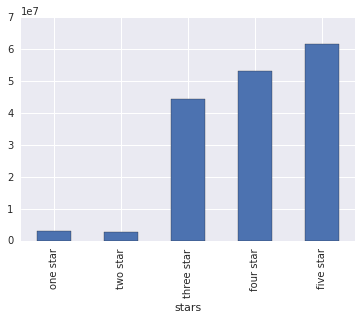

In [39]:
new_early_access.groupby(['stars'])['owners'].sum().plot(kind='bar')


In [40]:
#This makes the price data look like real dollar values
new_early_access['price'] = new_early_access['price'].astype(float)
new_early_access['price'] = new_early_access['price']/100

In [41]:
#This makes the price data look like real dollar values
new_ex_early_access['price'] = new_ex_early_access['price'].astype(float)
new_ex_early_access['price'] = new_ex_early_access['price']/100

In [42]:
new_early_access.price.max()

52.5

In [43]:
new_ex_early_access.price.max()

179.0

### Was attempting to sort the values for price of the ex early access games to get a better guess on how to divide it up. I wanted to do something similar to what I did above with the star ratings.  I wanted to do a pd.cut() on the prices and display them on graphs relative to number of owners. Will get back to this, if someone else wants to help, you are more than welcome

###   -Michael

In [44]:
#new_temp = new_ex_early_access['price']


In [45]:
#hold = new_temp.sort()

In [46]:
#new_early_access.tags.head()

### Below is where I have tested trying to look at the dataframe based on contraints. We can use this to look at data meeting certain criteria and pull out answers from that. Such as what tags exist in these games with this criteria met. Nothing below is concrete in terms of what to look for. Was just testing it out. 

### -Michael

In [47]:
len(new_early_access.loc[new_early_access['userscore'] == 100])

103

In [48]:
new_early_access.loc[new_early_access['userscore'] == 100].name.head()

242610                            Grappledrome
302810    Divinia Chronicles: Relics of Gan-Ti
312310                                Ensign-1
314350                                 Abatron
339560                               Man Alive
Name: name, dtype: object

In [49]:
total_early_reviews = new_early_access['negative'] + new_early_access['positive']

In [50]:
new_early_access['total reviews'] = total_early_reviews

In [51]:
new_early_access.loc[new_early_access['userscore'] >= 100].head()

,appid,average_2weeks,average_forever,developer,median_2weeks,median_forever,name,negative,owners,owners_variance,...,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore,stars,total reviews
242610,242610,0,4495,800 North,0,4495,Grappledrome,2,6928,2560,...,0,738,1444,19,9.99,800 North,74,100,five star,21
302810,302810,0,85,Team Monkey,0,119,Divinia Chronicles: Relics of Gan-Ti,3,5691,2321,...,0,2242,2534,28,14.99,Team Monkey,74,100,five star,31
312310,312310,0,17,Only Human Studios,0,28,Ensign-1,7,8907,2903,...,0,1494,2069,4,1.99,Only Human Studios,3,100,five star,11
314350,314350,0,0,W3 Studios,0,0,Abatron,0,747,1463,...,0,0,0,6,19.99,W3 Studios,100,100,five star,6
339560,339560,0,11,Global Empire Soft,0,11,Man Alive,11,6186,2419,...,0,747,1463,6,4.99,Global Empire Soft,3,100,five star,17


In [52]:
new_early_access.loc[new_early_access['total reviews'] >= 100].head()

,appid,average_2weeks,average_forever,developer,median_2weeks,median_forever,name,negative,owners,owners_variance,...,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore,stars,total reviews
108600,108600,276,1260,The Indie Stone,88,362,Project Zomboid,2007,872921,28720,...,5685,829126,27992,14127,14.99,The Indie Stone,64,87,five star,16134
15540,15540,0,130,"Dejobaan Games, LLC",0,36,1... 2... 3... KICK IT! (Drop That Beat Like a...,307,98476,9654,...,0,73238,8325,145,9.99,"Dejobaan Games, LLC",2,31,two star,452
206500,206500,71,572,Carbon Games,26,88,AirMech Strike,1102,1513013,37786,...,3060,985995,30520,6845,0.00,Carbon Games,61,86,five star,7947
215830,215830,846,887,Naddic Games,576,675,Closers,15,4206,1995,...,1995,4206,1995,90,14.99,En Masse Entertainment,58,85,five star,105
221100,221100,369,4887,Bohemia Interactive,76,1257,DayZ,63207,3693089,58901,...,10809,3662655,58660,112079,34.99,Bohemia Interactive,19,63,four star,175286


In [53]:
rating_check = new_early_access['total reviews'] < 50
high_score = new_early_access['userscore'] > 99

In [54]:
#new_early_access[rating_check & high_score].head()
len(new_early_access[rating_check & high_score])

100

In [55]:
new_early_access[rating_check & high_score]

,appid,average_2weeks,average_forever,developer,median_2weeks,median_forever,name,negative,owners,owners_variance,...,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore,stars,total reviews
242610,242610,0,4495,800 North,0,4495,Grappledrome,2,6928,2560,...,0,738,1444,19,9.99,800 North,74,100,five star,21
302810,302810,0,85,Team Monkey,0,119,Divinia Chronicles: Relics of Gan-Ti,3,5691,2321,...,0,2242,2534,28,14.99,Team Monkey,74,100,five star,31
312310,312310,0,17,Only Human Studios,0,28,Ensign-1,7,8907,2903,...,0,1494,2069,4,1.99,Only Human Studios,3,100,five star,11
314350,314350,0,0,W3 Studios,0,0,Abatron,0,747,1463,...,0,0,0,6,19.99,W3 Studios,100,100,five star,6
339560,339560,0,11,Global Empire Soft,0,11,Man Alive,11,6186,2419,...,0,747,1463,6,4.99,Global Empire Soft,3,100,five star,17
351170,351170,0,1042,C63 Industries,0,1042,Pixel: ru,0,1114,1258,...,0,742,1027,15,7.99,C63 Industries,100,100,five star,15
362940,362940,0,111,Emberheart Games,0,111,Courier of the Crypts,0,747,1463,...,0,747,1463,24,11.99,Emberheart Games,100,100,five star,24
370750,370750,0,0,Zinnusl,0,0,Dungeoncraft,0,2474,1530,...,0,0,0,2,9.99,Zinnusl,100,100,five star,2
373120,373120,0,4,Protomni Multimedia,0,4,Bernie Needs Love,7,10392,3136,...,0,1237,1082,11,2.99,Protomni Multimedia,17,100,five star,18
375550,375550,0,46,RiftyGames,0,21,DungeonRift,1,12371,3422,...,0,3959,1935,31,9.99,RiftyGames,95,100,five star,32


In [56]:
new_early_access['total reviews'].std()

15416.019582052339

In [57]:
new_early_access['total reviews'].median()

53.0

In [58]:
new_early_access['total reviews'].sum()

2388853

In [59]:
drop_zero = new_early_access['total reviews'] > 0

In [60]:
new_early_access = new_early_access[drop_zero]

In [61]:
new_early_access['total reviews'].sum()

2388853

In [62]:
new_early_access['total reviews'].median()

73.0

In [63]:
new_early_access['total reviews'].std()

16468.019487662361

a --------------------------------------

In [64]:
new_early_access.head()

,appid,average_2weeks,average_forever,developer,median_2weeks,median_forever,name,negative,owners,owners_variance,...,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore,stars,total reviews
108600,108600,276,1260,The Indie Stone,88,362,Project Zomboid,2007,872921,28720,...,5685,829126,27992,14127,14.99,The Indie Stone,64,87,five star,16134
15540,15540,0,130,"Dejobaan Games, LLC",0,36,1... 2... 3... KICK IT! (Drop That Beat Like a...,307,98476,9654,...,0,73238,8325,145,9.99,"Dejobaan Games, LLC",2,31,two star,452
206500,206500,71,572,Carbon Games,26,88,AirMech Strike,1102,1513013,37786,...,3060,985995,30520,6845,0.00,Carbon Games,61,86,five star,7947
215830,215830,846,887,Naddic Games,576,675,Closers,15,4206,1995,...,1995,4206,1995,90,14.99,En Masse Entertainment,58,85,five star,105
217120,217120,0,5268,Squid In A Box Ltd,0,5298,Waves 2,4,1979,1368,...,0,1979,1368,46,9.99,Squid In A Box Ltd,81,91,five star,50


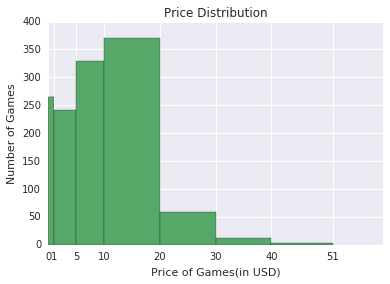

In [65]:
# This graph shows distribution of price of games in our data set 
bins= [0,1,5,10,20,30,40,51]
plt.hist(new_early_access.price, bins=bins, color="g")
plt.xticks(bins)

plt.title('Price Distribution')
plt.xlabel('Price of Games(in USD)')
plt.ylabel('Number of Games')

plt.show() 

In [66]:
import seaborn as sns
sns.set(color_codes=True)

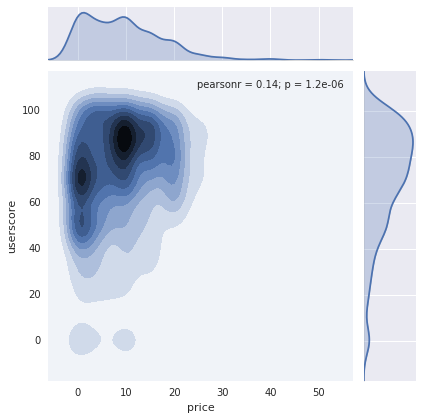

In [67]:
sns.jointplot(x=new_early_access['price'], y=new_early_access['userscore'], data=new_early_access, kind="kde");

# Correlation
Creating correlation heatmaps to observe the correlation between numeric values in our dataset. A new dataset must be created that contains only numeric values for correlation calculations. After creating the new data frame, each value must be changed to numeric values before they can be recognized by the correlation function.

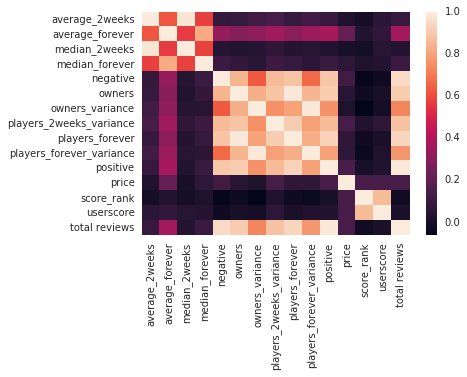

In [75]:
new_numeric = new_early_access[['average_2weeks','average_forever','median_2weeks','median_forever','negative','owners','owners_variance','players_2weeks_variance','players_forever','players_forever_variance','positive','price','score_rank','userscore','total reviews']]
new_numeric.head()

new_numeric['average_2weeks'] = pd.to_numeric(new_numeric['average_2weeks'], errors='coerce')
new_numeric['average_forever'] = pd.to_numeric(new_numeric['average_forever'], errors='coerce')
new_numeric['median_2weeks'] = pd.to_numeric(new_numeric['median_2weeks'], errors='coerce')
new_numeric['median_forever'] = pd.to_numeric(new_numeric['median_forever'], errors='coerce')
new_numeric['negative'] = pd.to_numeric(new_numeric['negative'], errors='coerce')
new_numeric['owners'] = pd.to_numeric(new_numeric['owners'], errors='coerce')
new_numeric['owners_variance'] = pd.to_numeric(new_numeric['owners_variance'], errors='coerce')
new_numeric['players_2weeks_variance'] = pd.to_numeric(new_numeric['players_2weeks_variance'], errors='coerce')
new_numeric['players_forever'] = pd.to_numeric(new_numeric['players_forever'], errors='coerce')
new_numeric['players_forever_variance'] = pd.to_numeric(new_numeric['players_forever_variance'], errors='coerce')
new_numeric['positive'] = pd.to_numeric(new_numeric['positive'], errors='coerce')
new_numeric['price'] = pd.to_numeric(new_numeric['price'], errors='coerce')
new_numeric['score_rank'] = pd.to_numeric(new_numeric['score_rank'], errors='coerce')
new_numeric['userscore'] = pd.to_numeric(new_numeric['userscore'], errors='coerce')
new_numeric['total reviews'] = pd.to_numeric(new_numeric['total reviews'], errors='coerce')

corr = new_numeric.corr()
sns.heatmap(corr)